- Created on : 16-sept 2019
- Reason : We found simple auto encoder with standardized inputs gives better results

In [1]:
from PIL import Image
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import sys
import os
import tqdm

Using TensorFlow backend.


##### Run only once

In [2]:
# print(%pwd)
os.chdir("../")
%pwd

'C:\\Haritha_C\\My Projects\\current\\LifeScience_PoC'

# to .bmp image

In [5]:
filelist= [file for file in os.listdir('./images/1024') if file.endswith('.png')]
infile_path = "./images/1024/"
outfile_path = "./images/1024_bmp/"
for i in filelist:
    Image.open(infile_path+i).convert('1').save(outfile_path+str(i).strip('.png')+".bmp")
    

In [17]:
# filelist

In [3]:
filelist= [file for file in os.listdir('./images/1024_bmp/') if file.endswith('.bmp')]
# filelist

In [4]:
datafolder = "./images/1024_bmp/"
filelist= [file for file in os.listdir(datafolder) if file.endswith('.bmp')]
training_data = []
for filename in filelist[:100]:
    try:
    #     print(filename)
        #Combines folder name and file name.
        path = os.path.join(datafolder,filename)
        #Opens an image as an Image object.
        image = Image.open(path)
        #print(image.size)
        #Resizes to a desired size.
        #image = image.resize((500,500))
        #Creates an array of pixel values from the image.
        pixel_array = np.asarray(image)
#         if pixel_array.shape != (500,500):
#             print(image.shape)
        training_data.append(pixel_array)
    except:
        print (filename)

#     #training_data is converted to a numpy array
# training_data
training_data = np.reshape(training_data,newshape=(-1,1024,1024,1))
# print(training_data.shape)
# print(training_data[0].shape)


In [5]:
training_data.shape

(100, 1024, 1024, 1)

In [6]:
# training_data[0][0]
train_flat = training_data.reshape(len(training_data),np.prod(training_data.shape[1:]))

In [7]:
import numpy as np
train_flat.shape
max_value = float(train_flat.max())
train_flat = train_flat.astype('float32') / max_value

train_flat = train_flat.reshape((len(train_flat), np.prod(train_flat.shape[1:])))
train_flat.shape
x_test = train_flat.astype('float32') / max_value

In [8]:
from keras.models import Model, Sequential
input_dim = train_flat.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()


Compression factor: 32768.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                33554464  
_________________________________________________________________
dense_2 (Dense)              (None, 1048576)           34603008  
Total params: 68,157,472
Trainable params: 68,157,472
Non-trainable params: 0
_________________________________________________________________


In [9]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1048576)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                33554464  
Total params: 33,554,464
Trainable params: 33,554,464
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_flat, train_flat,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(train_flat, x_test))

Train on 100 samples, validate on 100 samples
Epoch 1/5
100/100 [==============================] - 35s 346ms/step - loss: 0.6890 - val_loss: 0.6921
Epoch 2/5
100/100 [==============================] - 28s 283ms/step - loss: 0.6921 - val_loss: 0.7059
Epoch 3/5
100/100 [==============================] - 29s 295ms/step - loss: 0.7059 - val_loss: 0.6978
Epoch 4/5
100/100 [==============================] - 30s 304ms/step - loss: 0.6978 - val_loss: 0.7149
Epoch 5/5
100/100 [==============================] - 32s 315ms/step - loss: 0.7149 - val_loss: 0.6302


# Plot and see images before and after

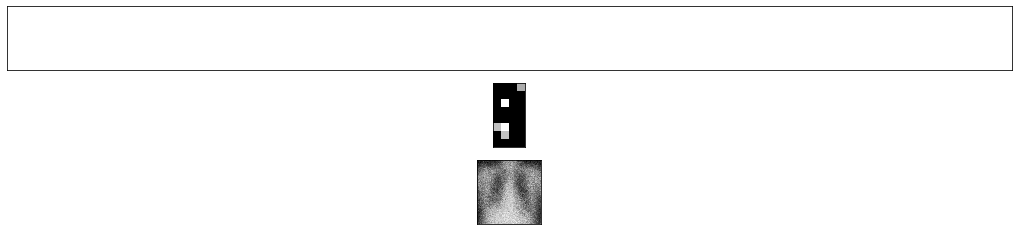

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
num_images = 1
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    #plt.imshow(x_test[image_idx].reshape(1024, 1024))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(1024, 1024))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Recheck the image

# issue is here********************************************************


(1024, 1024)


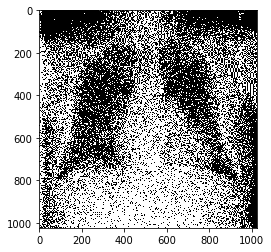

In [44]:
# import logging
# logging.basicConfig(level=logging.DEBUG)
# import matplotlib
# print('Version', matplotlib.__version__)
# import matplotlib.pyplot as plt
dat = ((train_flat[0].reshape(1024,1024)))
print(dat.shape)
plt.imshow(dat)
plt.show()
img = Image.fromarray(dat, 'L')
img.show()